In [7]:
import numpy as np
import matplotlib
import random
import matplotlib.pyplot as plt

In [8]:
np.random.seed(15)

d = 2
n = 10
Ntrn = 50
Ntst = 2000

mu1 = np.random.rand(d)
mu2 = np.random.rand(d)
S1 = np.random.rand(d, d)
S2 = np.random.rand(d, d)
sigma1 = np.dot(S1, S1.T)
sigma2 = np.dot(S2, S2.T)
mu1 = mu1 - 1
mu2 = mu2 + 1

In [9]:
def get_random_sample(n, mu1, mu2, sigma1, sigma2):

    points_1 = np.random.multivariate_normal(mu1, sigma1, n)
    points_2 = np.random.multivariate_normal(mu2, sigma2, n)
    
    X_n = np.concatenate((points_1, points_2), axis=0)
    
    Y1 = np.ones((n,), dtype=np.int)
    Y2 = -np.ones((n,), dtype=np.int)
    
    Y_n = np.concatenate((Y1, Y2), axis=0)
    return (X_n, Y_n)

In [12]:
X, Y = get_random_sample(Ntrn, mu1, mu2, sigma1, sigma2)

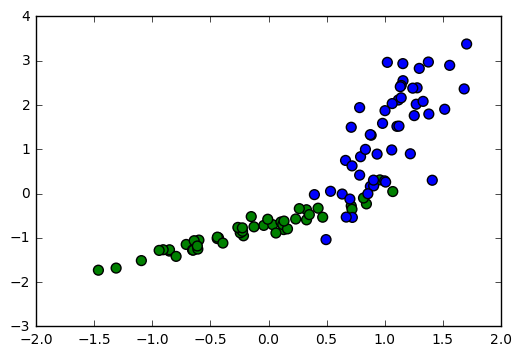

In [13]:
categories = np.array(Y)
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X[:,0], X[:,1], s=50, c=colormap[categories])
plt.show()

In [107]:
def perceptron(valX, valY, dim):
    w = [0] * dim
    b = 0
    
    c = list(zip(valX, valY))
    random.shuffle(c)
    valX, valY = zip(*c)
    
    for i, j in zip(valX, valY):
        prod = (np.dot(i.T, w) + b)*j
        if prod <= 0.0:
            w = w + i*j
            b = b + j
        
    return (w, b)

valw, valb = perceptron(X, Y, d)

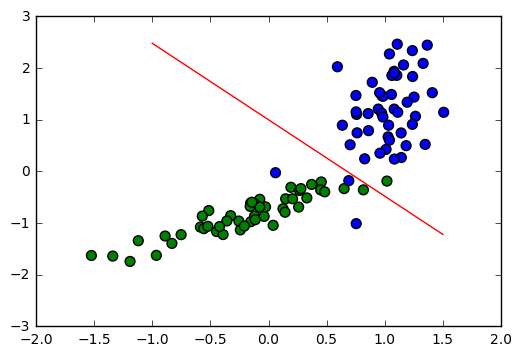

In [108]:
def fun(x):
    return x*valw[0] + valb

x = np.linspace(-1, 1.5, 50)
y = fun(x)

plt.plot(x, y, c='r')
plt.scatter(X[:,0], X[:,1], s=50, c=colormap[categories])
plt.show()


In [109]:
Xtst, Ytst = get_random_sample(Ntst, mu1, mu2, S1, S2)

# Testing
def test(valX):
    
    resY = []
    
    for i in valX:
        prod = np.dot(i.T, valw) + valb
        if prod <= 0.0:
            resY.append(-1)
        else:
            resY.append(1)
    
    return resY

